In [1]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as mfm
from matplotlib.patches import Rectangle, Circle, PathPatch, Arc
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [3]:
from matplotlib.text import Text, TextPath
from matplotlib.transforms import Affine2D

# https://matplotlib.org/3.1.1/gallery/mplot3d/pathpatch3d.html
def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    '''
    Plots the string 's' on the axes 'ax', with position 'xyz', size 'size',
    and rotation angle 'angle'.  'zdir' gives the axis which is to be treated
    as the third dimension.  usetex is a boolean indicating whether the string
    should be interpreted as latex or not.  Any additional keyword arguments
    are passed on to transform_path.

    Note: zdir affects the interpretation of xyz.
    '''
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

In [4]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    """
    https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
    """
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [8]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

# 7장 행렬 : 데이터를 편리하게 다룰 도구
- 딥 러닝을 공부하기 위해 선형대수학을 꼼꼼히 공부해야 한다고 강조
    - 선형대수학이 벡터 변환에 관한 학문이기 때문
    - 딥러닝은 '한 벡터 공간을 다른 벡터 공간으로 매핑하기 위한 단순하고 연속된 기하학적 변환을 연결한 것'

- 데이터를 벡터와 행렬로 표현하고 코딩할 때는 '벡터화'라는 방식 사용

## 행렬과 벡터

### 행렬
- 행렬은 수(함수)들을 직사각형 모양으로 괄호안에 배열해 놓은 것

#### 행렬에 대한 연산
- 덧셈

In [9]:
# numpy에는 matrix와 array자료형 있음
A = np.matrix([[1,2],[3,4]])
B = np.matrix([[10,20],[30,40]])

A+B

matrix([[11, 22],
        [33, 44]])

- 스칼라 곱셈
    - 스칼라 곱은 행렬에 있는 모든 요소들을 스칼라 배

In [10]:
3*B

matrix([[ 30,  60],
        [ 90, 120]])

- 행렬곱
    - 각 행과 각 열을 짝지어 곱한 다음 모두 더함

In [11]:
A = np.array([[1,2,3], [4,5,6]]) #-----[1] 다차원배열(array) 생성
B = np.array([[2,1], [1,2], [1,1]])

np.dot(A,B) #-----[2] numpy의 dot() 함수를 통해 행렬곱

array([[ 7,  8],
       [19, 20]])

- 전치
    - 행렬의 행과 열을 바꾸는 것
    - np.transpose() 함수 사용

In [12]:
A = np.arange(1, 7).reshape(2, 3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
A.transpose(1, 0)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [14]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

#### 특별한 행렬
- 단위행렬
    - 행과 열 개수가 같고 대각 요소만 모두 1인 행렬
    - 단위행렬은 어떤 행렬 A를 곱해도 결과는 A (스칼라의 1과같음)

In [15]:
A = np.matrix([[2, 4], [4, 2]])
I = np.matrix(np.eye(2)) # np.eye()는 단위행렬을 만드는 함수

print(A*I)
print(I*A)

[[2. 4.]
 [4. 2.]]
[[2. 4.]
 [4. 2.]]


- 역행렬
    - 임의의 정사각행렬 A에 어떤행렬 B를 곱해서 단위행렬이 되면, B를 A의 역행렬이라고 함
    - 역행렬이 없는 행렬을 특이행렬, 역행렬이 있는 행렬을 정칙행렬이라고 함
    
- 대각행렬
    - 대각 요소만 값을 가지는 행렬
    - 단위행렬은 대각행렬의 특수한 경우
    - 대각행렬은 역행렬을 구하기 쉬움 : 대각 성분에 역수를 취하면 역행렬 구할 수 있음

In [16]:
D = np.matrix(np.eye(3)*np.array([2,1,4]))
D.I

matrix([[0.5 , 0.  , 0.  ],
        [0.  , 1.  , 0.  ],
        [0.  , 0.  , 0.25]])

In [18]:
D.I*D

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

- 대칭행렬
    - 정사각행렬 S에 대해 S.T = S를 만족하는 행렬을 대칭행렬이라고 함
    
- 대각화
    - 임의의 정사각행렬 A에 어떤 행렬을 앞, 뒤로 곱해서 대각행렬로 만드는 것을 말함

In [19]:
# 대각화 예시
A = np.matrix([[2, 4], [4, 2]])
X = np.matrix([[ 0.7071, -0.7071], [ 0.7071,  0.7071]])
D = X.I*A*X
D

matrix([[ 6.,  0.],
        [ 0., -2.]])

### 벡터
- 벡터는 크기와 방향을 모두 가지는 대상
- 숫자 여러 개가 모여 있는 어레이로 표현 가능
- 행 또는 열이 하나뿐인 행렬이라고도 할 수 있음

C:\Users\Minhyeok\AppData\Local\Temp/ipykernel_13460/518509758.py:14: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


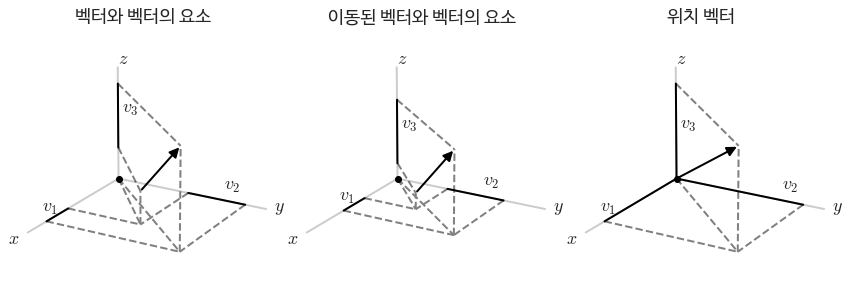

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
fig.set_size_inches((15,5))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.zaxis.set_tick_params(labelsize=15)

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.zaxis.set_tick_params(labelsize=15)

ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.zaxis.set_tick_params(labelsize=15)

x, y, z = 0, 1, 2
P = np.array([1.5, 1.8, 1])

Q = np.array([2.1, 3.2, 3])
O = (0, 0, 0)

axis_length = Q + 0.5

def draw_vector(ax, P, Q, elev, azim, title=''):
    
    arrow = Arrow3D([P[x], Q[x]], [P[y], Q[y]], [P[z], Q[z]], lw=2, color='k',
                   mutation_scale=20, arrowstyle="-|>" )
    ax.add_artist(arrow)
    ax.axis('off')
    
    ax.plot3D([Q[x], Q[x]], [0, Q[y]], [0,0], '--', color="gray")
    ax.plot3D([P[x], P[x]], [0, P[y]], [0,0], '--', color="gray")

    ax.plot3D([0, Q[x]], [Q[y], Q[y]], [0,0], '--', color="gray")
    ax.plot3D([0, P[x]], [P[y], P[y]], [0,0], '--', color="gray")

    ax.plot3D([P[x], P[x]], [P[y], P[y]], [0, P[z]], '--', color="gray") #p로의 세로선
    ax.plot3D([Q[x], Q[x]], [Q[y], Q[y]], [0, Q[z]], '--', color="gray") #p로의 세로선

    ax.plot3D([0, P[x]], [0, P[y]], [0,0], '--', color="gray")
    ax.plot3D([0, Q[x]], [0, Q[y]], [0,0], '--', color="gray")

    ax.plot3D([0, P[x]], [0, P[y]], [P[z], P[z]], '--', color="gray")
    ax.plot3D([0, Q[x]], [0, Q[y]], [Q[z], Q[z]], '--', color="gray")

    ax.plot3D([P[x], Q[x]], [0, 0], [0,0], lw=2, color='k')
    ax.plot3D([0,0], [P[y], Q[y]], [0,0],  lw=2, color='k')
    ax.plot3D([0,0], [0, 0], [P[z], Q[z]], lw=2, color='k')

    # 축 그리기 
    ax.plot3D([O[x], axis_length[0]], [0, 0], [0, 0], color='k', alpha=0.2)
    ax.text(axis_length[0]+0.5, 0, 0, '$x$', fontsize=18)
    
    ax.plot3D([0,0], [O[y], axis_length[1]], [0, 0], color='k', alpha=0.2)
    ax.text(0, axis_length[1]+0.2, 0, '$y$', fontsize=18)
    
    ax.plot3D([O[x], 0], [O[y], 0], [O[z], axis_length[2]], color='k', alpha=0.2)
    ax.text(0, 0, axis_length[2]+0.1, '$z$', fontsize=18)
    
    ax.plot([O[x]], [O[y]], [O[z]], 'o', color='k')

    # 콤포넌트 그리기
    ax.text(P[x]+(Q[x]-P[x])-0.3, -0.4, 0, '$v_1$', fontsize=18)
    ax.text(-0.4, P[y]+(Q[y]-P[y])-0.8, 0, '$v_2$', fontsize=18)
    ax.text(0, 0.1,  P[z]+(Q[y]-P[z])/2,   '$v_3$', fontsize=18)

    ax.set_title(title, fontproperties=fontprop)
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$y$', fontsize=20)
    ax.set_zlabel('$z$', fontsize=20)
    
    ax.set_xlim((0, 2.5))
    ax.set_ylim((0, 3.5))
    ax.set_zlim((0, 3.5))
    
    ax.view_init(elev, azim)
    
draw_vector(ax1, P, Q, 20, 30, '벡터와 벡터의 요소')  
draw_vector(ax2, P-0.5, Q-0.5, 20, 30, '이동된 벡터와 벡터의 요소') 
draw_vector(ax3, O, Q, 20, 30, '위치 벡터') 

plt.subplots_adjust(hspace=0.05, wspace=0.0)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 화살표가 공간에 놓여있는 두 가지 경우
    - 1, 2번째는 임의의 위치에 화살표가 있고, 마지막은 화살표의 꼬리가 좌표축 원점에 위치
    - 화살표들은 벡터를 표시한 것
    - 1, 2번째 표시된 화살표는 크기와 방향이 같지만 위치는 서로 다름 (성분은 달라지지 않음)
    - 세번째처럼 벡터의 시작점을 고정하면 벡터의 끝점은 위치를 나타냄 (= 위치 벡터)
    - 요소의 개수를 벡터의 차원이라고 함

#### 벡터에 대한 연산 : 덧셈, 뺄셈과 스칼라 곱셈
- 스칼라 곱셈은 벡터의 모든 요소에 동일하게 스칼라 배
- 덧셈, 뺄셈은 두 벡터 간 차원이 같아야 함
    - 벡터는 방향이라는 물리적 의미가 중요하므로 덧, 뺄셈의 결과가 어떤 방향을 향하는 지 알아야 함

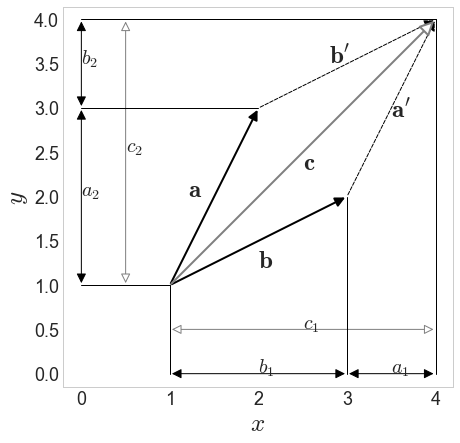

In [21]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

a = np.array( [[1, 1],[2, 3]] )
da = a[1]-a[0]

b = np.array( [[1, 1],[3, 2]] )
db = b[1]-b[0]


vec_a = FancyArrowPatch(a[0], a[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_a)

vec_b = FancyArrowPatch(b[0], b[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_b)

a_ = a + db # + db[1]
vec_a_ = FancyArrowPatch(a_[0], a_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_a_)

b_ = b + da
vec_b_ = FancyArrowPatch(b_[0], b_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_b_)

dc = da+db
c = a.copy()
c[1,:] = c[0,:]+dc
vec_c = FancyArrowPatch(c[0], c[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray')
ax.add_patch(vec_c)

# 가로 선
ax.plot( (0, a[0,0]),(a[0,1], a[0,1]), lw=1, color='k' )
ax.plot( (0, a[1,0]),(a[1,1], a[1,1]), lw=1, color='k' )
ax.plot( (0, a_[1,0]),(a_[1,1], a_[1,1]), lw=1, color='k' )

# 세로 선
ax.plot( (a[0,0], a[0,0]), (0, a[0,1]), lw=1, color='k' )
ax.plot( (b[1,0], b[1,0]), (0, b[1,1]), lw=1, color='k' )
ax.plot( (b_[1,0], b_[1,0]), (0, b_[1,1]), lw=1, color='k' )

vec_ay = FancyArrowPatch((0.0, a[0,1]), (0.0, a[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ay)

vec_by = FancyArrowPatch((0.0, a[1,1]), (0.0, a[1,1]+db[1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_by)

vec_cy = FancyArrowPatch((0.5,c[0,1]), (0.5,c[1,1]), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cy)

vec_ax = FancyArrowPatch((a[0,0], 0.0), (b[1,0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ax)

vec_bx = FancyArrowPatch((b[1,0], 0.0), (a[1,1]+da[0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_bx)

vec_cx = FancyArrowPatch((c[0,0],0.5), (c[1,0],0.5), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cx)

ax.text(1.2, 2, r"$\mathbf{a}$", fontsize=25)
ax.text(3.5, 2.9, r"$\mathbf{a}'$", fontsize=25)
ax.text(2, 1.2, r"$\mathbf{b}$", fontsize=25)
ax.text(2.8, 3.5, r"$\mathbf{b}'$", fontsize=25)
ax.text(2.5, 2.3, r"$\mathbf{c}$", fontsize=25)

ax.text(0.5, 2.5, r"$c_2$", fontsize=20)
ax.text(0.0, 2.0, r"$a_2$", fontsize=20)
ax.text(0.0, 3.5, r"$b_2$", fontsize=20)

ax.text(2.5, 0.5, r"$c_1$", fontsize=20)
ax.text(2.0, 0.0, r"$b_1$", fontsize=20)
ax.text(3.5, 0.0, r"$a_1$", fontsize=20)

plt.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-2.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-2.pdf", format='pdf', bbox_inches='tight')
    
    
plt.show()

- 벡터 a와 b를 덧셈하여 만들어지는 벡터 c를 나타냄
    - 결과 벡터c는 두 벡터를 평행이동시켜 평행사변형을 만들었을 때 그것의 대각선벡터
    - 벡터 덧셈에서 결과벡터가 향하는 방향은 덧셈하는 두 벡터가 주어지면 한눈에 알 수 있음

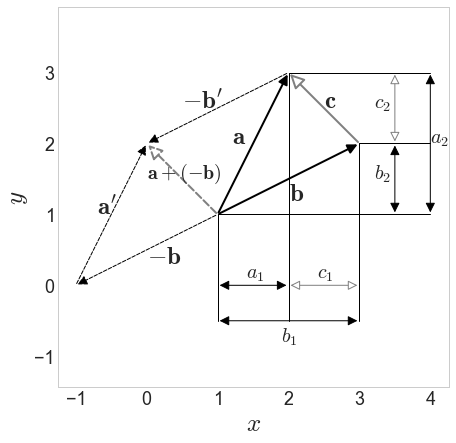

In [22]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

a = np.array( [[1, 1],[2, 3]] )
da = a[1]-a[0]

b = np.array( [[1, 1],[3, 2]] )
db = b[1]-b[0]

vec_a = FancyArrowPatch(a[0], a[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_a)

vec_b = FancyArrowPatch(b[0], b[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_b)

minus_b = b.copy()
minus_b[1,:] = minus_b[0,:]-db
vec_minus_b = FancyArrowPatch(minus_b[0], minus_b[1], ls='--', lw=1, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_minus_b)

a_ = a - db # + db[1]
vec_a_ = FancyArrowPatch(a_[0], a_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_a_)

b_ = minus_b + da
vec_b_ = FancyArrowPatch(b_[0], b_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_b_)

db_ = minus_b[1]-minus_b[0]
dc_ = da+db_
c_ = a.copy()
c_[1,:] = c_[0,:]+dc_
vec_c_ = FancyArrowPatch(c_[0], c_[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray', ls='--')
ax.add_patch(vec_c_)

dc = da-db
c = b.copy()
c[0,:] = c[1,:]
c[1,:] = c[0,:]+dc

vec_c = FancyArrowPatch(c[0], c[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray')
ax.add_patch(vec_c)

# 세로 선
ax.plot( (a[0,0], a[0,0]), (-0.5, a[0,1]), lw=1, color='k' )
ax.plot( (a[1,0], a[1,0]), (-0.5, a[1,1]), lw=1, color='k' )
ax.plot( (b[1,0], b[1,0]), (-0.5, b[1,1]), lw=1, color='k' )

# 가로 선
ax.plot( (a[0,0], 4), (a[0,1], a[0,1]), lw=1, color='k' )
ax.plot( (b[1,0], 4), (b[1,1], b[1,1]), lw=1, color='k' )
ax.plot( (a[1,0], 4), (a[1,1], a[1,1]), lw=1, color='k' )

vec_ay = FancyArrowPatch((4.0, a[0,1]), (4.0, a[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ay)

vec_by = FancyArrowPatch((3.5, b[0,1]), (3.5, b[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_by)

vec_cy = FancyArrowPatch((3.5, c[0,1]), (3.5,c[1,1]), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cy)

vec_bx = FancyArrowPatch((a[0,0], -0.5), (b[1,0], -0.5), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_bx)

vec_ax = FancyArrowPatch((a[0,0], 0.0), (a[1,0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ax)

vec_cx = FancyArrowPatch((c[0,0],0.0), (c[1,0],0.0), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cx)

ax.text(1.2, 2, r"$\mathbf{a}$", fontsize=25)
ax.text(-0.7, 1.0, r"$\mathbf{a}'$", fontsize=25)
ax.text(2, 1.2, r"$\mathbf{b}$", fontsize=25)
ax.text(0, 0.3, r"$-\mathbf{b}$", fontsize=25)
ax.text(0.5, 2.5, r"$-\mathbf{b}'$", fontsize=25)

ax.text(2.4, 0.1, r"$c_1$", fontsize=20)
ax.text(1.4, 0.1, r"$a_1$", fontsize=20)
ax.text(1.9, -0.8, r"$b_1$", fontsize=20)

ax.text(3.2, 2.5, r"$c_2$", fontsize=20)
ax.text(4.0, 2.0, r"$a_2$", fontsize=20)
ax.text(3.2, 1.5, r"$b_2$", fontsize=20)

ax.text(0, 1.5, r"$\mathbf{a}+(-\mathbf{b})$", fontsize=20)
ax.text(2.5, 2.5, r"$\mathbf{c}$", fontsize=25)

plt.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-3.pdf", format='pdf', bbox_inches='tight')
    
    
plt.show()

- 벡터a와 벡터b의 뺄셈을 나타냄
    - 결과 벡터 c는 b 머리에서 a 머리로 향하고 있음
    - 결과 벡터의 방향이 결정되는 방식은 a - b를 a + (-b)로 생각하면 직관적으로 이해가능

#### 벡터 노름
- 노름이란 벡터의 크기를 의미
- 주로 다루는 벡터의 크기는 L1 노름과 L2 노름이 있음

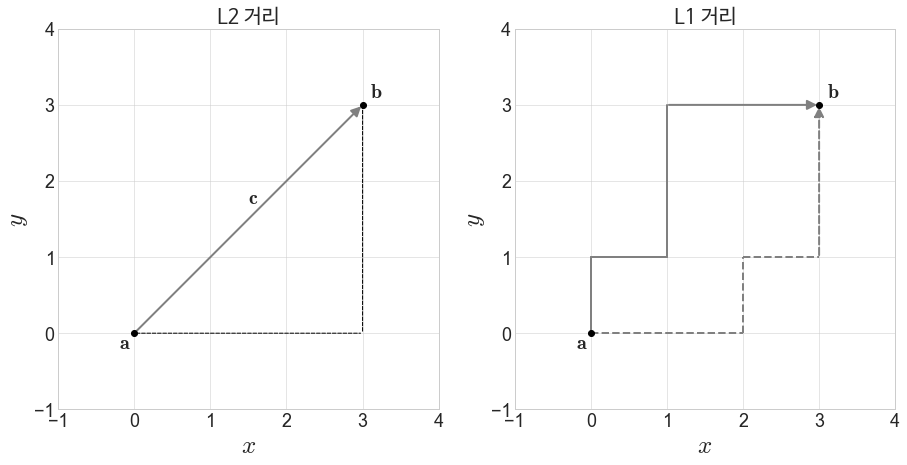

In [23]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)

a = np.array([0, 0])
b = np.array([3, 3])
vec_a = FancyArrowPatch((0, 0), (3, 0) , lw=1, mutation_scale=20, arrowstyle="-", color='k', ls='--')
ax1.add_patch(vec_a)

vec_b = FancyArrowPatch((3, 0), (3, 3) , lw=1, mutation_scale=20, arrowstyle="-", color='k', ls='--')
ax1.add_patch(vec_b)

c = np.array( [a, b] )
dc = c[1]-c[0]
vec_c = FancyArrowPatch(c[0], c[1], lw=2, mutation_scale=20, arrowstyle="-|>", color='gray')
ax1.add_patch(vec_c)

ax1.plot(*a, 'o', color='k')
ax1.plot(*b, 'o', color='k')

ax1.text(-0.2,-0.2, r"$\mathbf{a}$", fontsize=20)
ax1.text(3.1, 3.1, r"$\mathbf{b}$", fontsize=20)
ax1.text(1.5, 1.7, r"$\mathbf{c}$", fontsize=20)
ax1.set_title("L2 거리", fontsize=20, fontproperties=fontprop)
ax1.set_xlim(-1, 4)
ax1.set_ylim(-1, 4)

ax2.plot((0, 0), (0, 1), lw=2, color='gray')
ax2.plot((0, 1), (1, 1), lw=2, color='gray')
ax2.plot((1, 1), (1, 3), lw=2, color='gray')
# ax2.plot((1, 3), (3, 3), lw=2, color='gray')
vec_a = FancyArrowPatch((1, 3), (3, 3) , lw=2, mutation_scale=20, arrowstyle="-|>", color='gray')
ax2.add_patch(vec_a)

ax2.plot((0, 2), (0, 0), lw=2, ls='--', color='gray')
ax2.plot((2, 2), (0, 1), lw=2, ls='--', color='gray')
ax2.plot((2, 3), (1, 1), lw=2, ls='--', color='gray')
vec_b = FancyArrowPatch((3, 1), (3, 3) , lw=2, mutation_scale=20, ls='--', arrowstyle="-|>", color='gray')
ax2.add_patch(vec_b)

ax2.plot(*a, 'o', color='k')
ax2.plot(*b, 'o', color='k')
ax2.text(-0.2,-0.2, r"$\mathbf{a}$", fontsize=20)
ax2.text(3.1, 3.1, r"$\mathbf{b}$", fontsize=20)
ax2.set_title("L1 거리", fontsize=20, fontproperties=fontprop)
ax2.set_xlim(-1, 4)
ax2.set_ylim(-1, 4)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-4.pdf", format='pdf', bbox_inches='tight')

plt.show()

1. L2노름
    - 피타고라스 정리를 이용한 벡터의 크기
    - c의 요소를 제곱하여 더하고 루트를 씌운 것이 c의 길이가 됨
    
2. L1노름
    - 대각선으로 선을 그을 수 없다고 한다면, 오른쪽 그림처럼 됨
    - 어떤 경로를 따라가더라도 a와 b사이에 거리는 6
    - 맨해튼 거리라고도 함

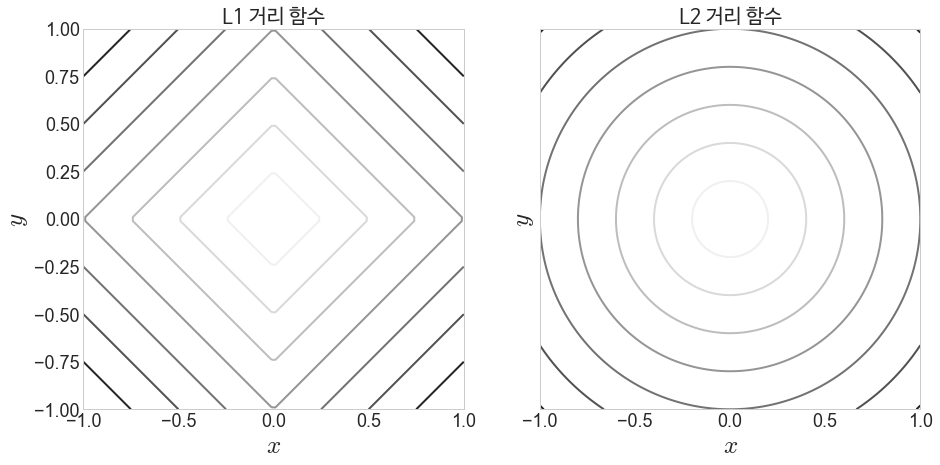

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches((15,7))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)
ax2.grid(False)

l1 = lambda x1, x2 : np.abs(x1) + np.abs(x2)
l2 = lambda x1, x2 : np.sqrt(x1**2 + x2**2)

x = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x, x)

L1 = l1(X1,X2)
L2 = l2(X1,X2)

ax1.contour(X1, X2, L1)
ax1.set_title("L1 거리 함수", fontsize=20, fontproperties=fontprop)
ax1.axis('equal')

ax2.contour(X1, X2, L2)
ax2.set_title("L2 거리 함수", fontsize=20, fontproperties=fontprop)
ax2.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-5.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

- 요소가 2개인 벡터에 대한 노름은 이변수 스칼라 함수
    - 주어진 벡터를 숫자 하나에 대응시키기 때문

- L1, L2 노름을 각각 이변수 스칼라 함수로 보고 그린 그림
    - 어떤 거리를 사용하는가에 따라 원점에서 떨어진 거리가 같은 지점이 다름을 알 수 있음
    
#### 단위벡터
- 벡터의 크기가 1인 벡터
- 단위벡터가 아닌 벡터를 단위벡터로 만들기 위해서는 벡터의 크기로 각 요소를 나누면 됨

#### 벡터의 내적과 외적
- 벡터끼리의 곱셈은 내적, 외적, 크로스적이 있음

1. 내적
    - 두 벡터에 대해 정의된 연산이며 두 벡터를 연산하여 스칼라 하나로 대응시킴
    - 두 벡터가 직교하면 내적값은 0 (= 내적값으로 직교여부 판단 가능)

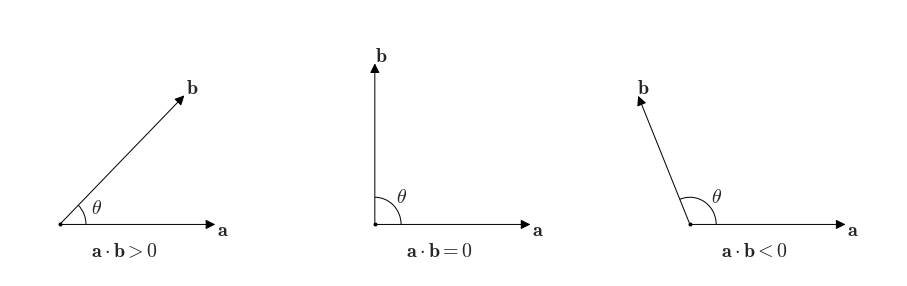

In [26]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


a = np.array([(1, 0.5), (2.5, 0.5)])
da = a[1]-a[0]
vec_a = FancyArrowPatch(a[0], a[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax1.add_patch(vec_a)

b = np.array([(1, 0.5), (2.2, 1.7)])
db = b[1]-b[0]
vec_b = FancyArrowPatch(b[0], b[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax1.add_patch(vec_b)
ax1.plot(*a[0], '.', color='k')

theta = 180*np.arccos(np.dot(da,db) / (np.linalg.norm(da)*np.linalg.norm(db)))/np.pi
e = Arc((1, 0.5), 0.5, 0.5, angle=0, theta1=0, theta2=theta,
        color='k',linewidth=1, fill=False, zorder=2)
ax1.add_patch(e)
ax1.text(1.3, 0.6, r"$\theta$", fontsize=20)
ax1.text(2.5, 0.4, r"$\mathbf{a}$", fontsize=20)
ax1.text(2.2, 1.7, r"$\mathbf{b}$", fontsize=20)
ax1.text(1.3, 0.2, r"$\mathbf{a}\cdot\mathbf{b}>0$", fontsize=20)
ax1.axis('off')
ax1.set_xlim(0.5, 3)
ax1.set_ylim(0, 2.5)

##################################################################################
a = np.array([(1, 0.5), (2.5, 0.5)])
da = a[1]-a[0]
vec_a = FancyArrowPatch(a[0], a[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax2.add_patch(vec_a)

b = np.array([(1, 0.5), (1, 2.)])
db = b[1]-b[0]
vec_b = FancyArrowPatch(b[0], b[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax2.add_patch(vec_b)
ax2.plot(*a[0], '.', color='k')

theta = 180*np.arccos(np.dot(da,db) / (np.linalg.norm(da)*np.linalg.norm(db)))/np.pi
e = Arc((1, 0.5), 0.5, 0.5, angle=0, theta1=0, theta2=theta,
        color='k',linewidth=1, fill=False, zorder=2)
ax2.add_patch(e)
ax2.text(1.2, 0.7, r"$\theta$", fontsize=20)
ax2.text(2.5, 0.4, r"$\mathbf{a}$", fontsize=20)
ax2.text(1, 2, r"$\mathbf{b}$", fontsize=20)
ax2.text(1.3, 0.2, r"$\mathbf{a}\cdot\mathbf{b}=0$", fontsize=20)
ax2.axis('off')
ax2.set_xlim(0.5, 3)
ax2.set_ylim(0, 2.5)

##################################################################################
a = np.array([(1, 0.5), (2.5, 0.5)])
da = a[1]-a[0]
vec_a = FancyArrowPatch(a[0], a[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax3.add_patch(vec_a)

b = np.array([(1, 0.5), (0.5, 1.7)])
db = b[1]-b[0]
vec_b = FancyArrowPatch(b[0], b[1], lw=1, 
                        color='k', mutation_scale=20, arrowstyle="-|>")
ax3.add_patch(vec_b)
ax3.plot(*a[0], '.', color='k')

theta = 180*np.arccos(np.dot(da,db) / (np.linalg.norm(da)*np.linalg.norm(db)))/np.pi
e = Arc((1, 0.5), 0.5, 0.5, angle=0, theta1=0, theta2=theta,
        color='k',linewidth=1, fill=False, zorder=2)
ax3.add_patch(e)
ax3.text(1.2, 0.7, r"$\theta$", fontsize=20)
ax3.text(2.5, 0.4, r"$\mathbf{a}$", fontsize=20)
ax3.text(0.5, 1.7, r"$\mathbf{b}$", fontsize=20)
ax3.text(1.3, 0.2, r"$\mathbf{a}\cdot\mathbf{b}<0$", fontsize=20)
ax3.axis('off')
ax3.set_xlim(0.5, 3)
ax3.set_ylim(0, 2.5)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-6.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-6.pdf", format='pdf', bbox_inches='tight')

plt.show()

2. 외적
    - 내적이 행벡터와 열벡터의 행렬곱이라면, 외적은 열벡터와 행벡터의 행렬곱
    - 결과는 행렬이 됨
    
- 내적은 결과가 스칼라이므로 스칼라곱, 외적은 결과가 행렬이므로 텐서곱이라고 부르기도 함

## 행렬을 이용한 데이터 표현

### 테이블형 데이터
- 입력데이터 x 벡터가 모여 있는 데이터세트 X를 행렬로 표시하는 것과 같음
- 데이터의 차원이 N, 데이터의 특징 수가 D개라면 데이터세트 X는 항상 (N, D) 행렬이 됨

### 이미지
- 이미지의 각 점을 숫자로 표현하고 각 점의 2차원 위치 정보를 행렬로 표현
- 흑백이미지의 경우는 행렬하나로 표현가능
- 컬러이미지의 경우 다차원 배열 (보통 R, G, B의 3차원)로 표현

In [27]:
def cube2d(ax, origin, dx=1, dy=1, dc=0.1, axis='off', hidden=False):
    x0, y0 = origin
    
    if hidden==False:
        ax.plot((x0, x0+dx), (y0, y0), lw=2, color='k')
        ax.plot((x0+dx, x0+dx), (y0, y0+dy), lw=2, color='k')
        ax.plot((x0+dx, x0), (y0+dy, y0+dy), lw=2, color='k')
        ax.plot((x0, x0), (y0+dy, y0), lw=2, color='k')

    ax.plot((x0, x0+dc), (y0+dy, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx, x0+dx+dc), (y0+dy, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx, x0+dx+dc), (y0, y0+dc), lw=2, color='k')
    
    ax.plot((x0+dc, x0+dx+dc), (y0+dy+dc, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dc, x0+dx+dc), (y0+dy+dc, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx+dc, x0+dx+dc), (y0+dy+dc, y0+dc), lw=2, color='k')
    
    ax.axis(axis)

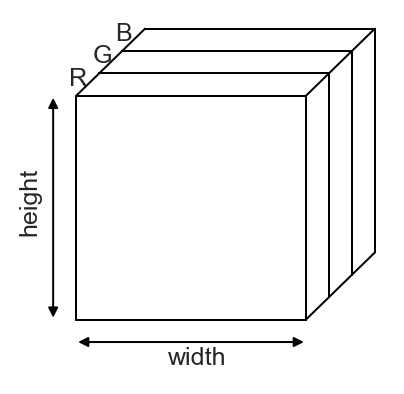

In [28]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
    
cube2d(ax, (0, 0))
cube2d(ax, (0.1, 0.1), hidden=True)
cube2d(ax, (0.2, 0.2), hidden=True)

width = FancyArrowPatch((0, -0.1), (1, -0.1), lw=2,  mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(width)

height = FancyArrowPatch((-0.1, 0), (-0.1, 1), lw=2,  mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(height)

ax.text(0.4, -0.2, "width", fontsize=25)
ax.text(-0.25, 0.4, "height", fontsize=25, rotation=90)

ax.text(-0.03, 1.05, "R", fontsize=25)
ax.text(0.07, 1.15, "G", fontsize=25)
ax.text(0.17, 1.25, "B", fontsize=25)

ax.set_xlim(-0.3, 1.4)
ax.set_ylim(-0.3, 1.4)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-7.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-7.pdf", format='pdf', bbox_inches='tight')

plt.show()

- 간단한 코드실습

(256, 272, 4)


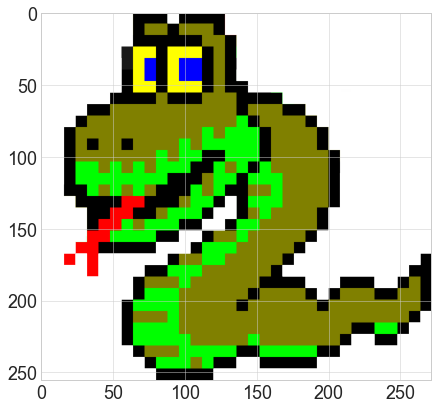

In [29]:
im = plt.imread("noviceml/img/old_python.png")
print(im.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

ax.imshow(im)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-8.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-8.pdf", format='pdf', bbox_inches='tight')

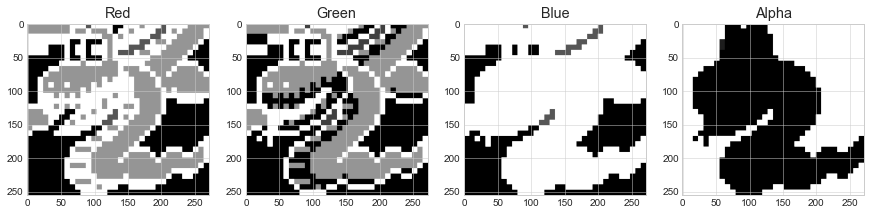

In [30]:
R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]
A = im[:,:,3]

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(R)
ax1.set_title("Red")
ax2.imshow(G)
ax2.set_title("Green")
ax3.imshow(B)
ax3.set_title("Blue")
ax4.imshow(A)
ax4.set_title("Alpha")

plt.show()

if file_print == True :
    fig.savefig("imgs/chap7/fig7-9.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-9.pdf", format='pdf', bbox_inches='tight')

- 순서대로 빨강, 초록, 파랑을 나타냄 / 마지막은 투명도를 나타내는 값들

### 문서
- 게시물분류, 스팸메일 분류 등의 데이터는 문서
- 문서를 모델에 입력할 수 있는 형태로 만들기 위해 행렬 사용

In [31]:
docs = [
'This is the first document',
'This is the second document',
'And the third one',
'Is this the first document']

V = ['<NULL>', 'and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

- 문서에 나타내는 단어가 단어장의 몇 번째 단어인지 인덱스로 교체

In [32]:
pre_docs = list(map(lambda x : x.lower().split(), docs))
pre_docs

D = [[V.index(w) for w in doc] for doc in pre_docs ]

print(D)

[[9, 4, 7, 3, 2], [9, 4, 7, 6, 2], [1, 7, 8, 5], [4, 9, 7, 3, 2]]


- 문서의 크기가 모두 다르므로, 문서 길이를 통일하여 짧은 문서는 빈문자로 채워주고, 긴 문서는 잘라냄

In [34]:
N = max([len(doc) for doc in pre_docs]) #-----[1]
pre_docs = [doc + ['<NULL>']*(N-len(doc)) for doc in pre_docs] #-----[2]
pre_docs

[['this', 'is', 'the', 'first', 'document'],
 ['this', 'is', 'the', 'second', 'document'],
 ['and', 'the', 'third', 'one', '<NULL>'],
 ['is', 'this', 'the', 'first', 'document']]

In [35]:
# 숫자(인덱스)로 교체
D = [[V.index(w) for w in doc] for doc in pre_docs ]
D = np.array(D)
D

array([[9, 4, 7, 3, 2],
       [9, 4, 7, 6, 2],
       [1, 7, 8, 5, 0],
       [4, 9, 7, 3, 2]])

## 넘파이
- 파이썬에서 과학계산을 하기위해 만들어진 라이브러리
- ndarray와 array를 다루는 함수로 구성
- 텐서 : 아래 그림처럼 차원이 늘어나면서 확장되는 자료를 나타내기 위한 수학도구

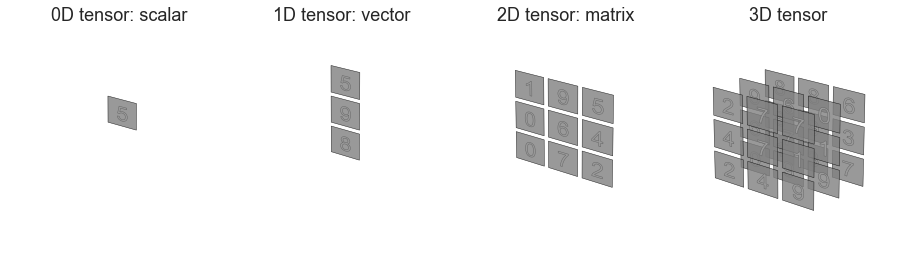

In [5]:
fig = plt.figure(figsize=(16,5))

np.random.seed(1)

ax1 = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142, projection='3d')
ax3 = fig.add_subplot(143, projection='3d')
ax4 = fig.add_subplot(144, projection='3d')

k = 2.3
rx, ry = 2, 2

###############################################################################################
offset_x, offset_y, offset_z = 0, 0, 1.5
d = 5
i = 0
j = 1

text3d(ax1, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
       zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
bottom, left = i*k+offset_x, j*k+offset_y
rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
ax1.add_patch(rect)
art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')
            
ax1.set_xlim(0, 7)
ax1.set_ylim(0, 7)
ax1.set_zlim(0, 7)
ax1.view_init(20, -50)
ax1.set_title("0D tensor: scalar", fontsize=18)
ax1.axis('off')
###############################################################################################

###############################################################################################
offset_x, offset_y, offset_z = 0, 0, 1.5
d = 5
i = 0

for j in range(3):
    text3d(ax2, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
           zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
    bottom, left = i*k+offset_x, j*k+offset_y
    rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
    ax2.add_patch(rect)
    art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')
            
ax2.set_xlim(0, 7)
ax2.set_ylim(0, 7)
ax2.set_zlim(0, 7)
ax2.view_init(20, -50)
ax2.set_title("1D tensor: vector", fontsize=18)
ax2.axis('off')
###############################################################################################

###############################################################################################
offset_x, offset_y, offset_z = -1, 0, 1.5
d = 3

for i in range(3):
    for j in range(3):
        text3d(ax3, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
               zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
        bottom, left = i*k+offset_x, j*k+offset_y
        rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
        ax3.add_patch(rect)
        art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')
            
ax3.set_xlim(0, 7)
ax3.set_ylim(0, 7)
ax3.set_zlim(0, 7)
ax3.view_init(20, -50)
ax3.set_title("2D tensor: matrix", fontsize=18)
ax3.axis('off')
###############################################################################################

###############################################################################################
offset_x, offset_y, offset_z = 0, 0, 1.5

for d in range(0, 5, 2):
    for i in range(3):
        for j in range(3):
            # print(d)
            text3d(ax4, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
                   zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
            bottom, left = i*k+offset_x, j*k+offset_y
            rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
            ax4.add_patch(rect)
            art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')
            
ax4.set_xlim(0, 7)
ax4.set_ylim(0, 7)
ax4.set_zlim(0, 7)
ax4.view_init(20, -50)
ax4.set_title("3D tensor", fontsize=18)
ax4.axis('off')
###############################################################################################


plt.subplots_adjust(hspace=0.05, wspace=0.0)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-10.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-10.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

### 넘파이 어레이
- 넘파이 어레이를 생성하는 방법

In [6]:
# 리스트를 np.array()로 감싸는 방법
A = np.array([1,2,3,4])
A

array([1, 2, 3, 4])

In [7]:
B = np.array([[1,2],[3,4]])
B

array([[1, 2],
       [3, 4]])

In [8]:
print(A.shape)
print(B.shape)

(4,)
(2, 2)


In [9]:
A.reshape(1,4)

array([[1, 2, 3, 4]])

In [10]:
A.reshape(4,1)

array([[1],
       [2],
       [3],
       [4]])

- 리스트를 사용하지 않는 방법들

In [11]:
np.random.rand(3,2) # 0에서 1사이의 무작위 소수로 채워진 3행 2열 ndarray 생성
np.ones((3,2)) # 모두 1로 채워진 3행 2열 ndarray 생성
np.ones_like(A) # A라는 ndarray와 모양은 같고 모두 1로 채워진 ndarray 생성
np.zeros((3,2)) # 모두 0으로 채워진 3행 2열 ndarray 생성
np.zeros_like(A) # A라는 ndarray와 모양은 같고 모두 0으로 채워진 ndarray 생성
np.full((3,2), 10) # 모두 10으로 채워진 3행 2열 ndarray 생성
np.arange(10) # 0부터 9까지 순차적인 자연수로 ndarray를 생성

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 넘파이 어레이 연산
- 사칙연산은 기본적으로 요소별로 적용됨

In [13]:
np.random.seed(12)

A = np.random.randint(0,9,4).reshape(2,2)
B = np.random.randint(0,9,4).reshape(2,2)+1
print(A, B)

[[6 1]
 [2 3]] [[4 1]
 [7 2]]


In [14]:
A+B

array([[10,  2],
       [ 9,  5]])

In [15]:
np.dot(A,B)

array([[31,  8],
       [29,  8]])

In [17]:
def cube2d2(ax, origin, dx=1, dy=1, dc=0.1, label='', fc=10, la=1.0, 
            hidden=(None,), **kwargs):
    x0, y0 = origin
    
    if 'F' not in hidden : # hidden !='F':
        ax.plot((x0, x0+dx), (y0, y0), **kwargs)                   # F,아래쪽
        if 'L' not in hidden : #hidden!='L':
            ax.plot((x0, x0), (y0+dy, y0), **kwargs)               # F, 왼쪽
        if 'U' not in hidden : #hidden!='U':
            ax.plot((x0+dx, x0), (y0+dy, y0+dy), **kwargs)         # F, 위쪽
        if 'R' not in hidden :# hidden!='R':
            ax.plot((x0+dx, x0+dx), (y0, y0+dy), **kwargs)         # F, 오른쪽
    
    if 'U' not in hidden : # hidden!='U':
        ax.plot((x0+dc, x0+dx+dc), (y0+dy+dc, y0+dy+dc), **kwargs)     # U, 위쪽
        if 'L' not in hidden : # hidden!='L':
            ax.plot((x0, x0+dc), (y0+dy, y0+dy+dc), **kwargs)          # U, 왼쪽
        if 'R' not in hidden : # hidden!='R':
            ax.plot((x0+dx, x0+dx+dc), (y0+dy, y0+dy+dc), **kwargs)    # U, 오른쪽
    
    if 'R+' not in hidden and 'R' not in hidden : # hidden!='R':
        ax.plot((x0+dx, x0+dx+dc), (y0, y0+dc), **kwargs)          # R, 아래쪽
        ax.plot((x0+dx+dc, x0+dx+dc), (y0+dy+dc, y0+dc), **kwargs) # R, 오른쪽
    
    ax.text(x0 + 0.5 * dx, y0 + 0.5 * dy, label,
            ha='center', va='center', fontsize=fc, alpha=la)
    
box_solid  = dict(c='k', lw=2, alpha=1.0,)
box_gray   = dict(c='k', lw=2, alpha=0.2,)

### 축
- 어레이는 차원이 하나씩 늘어날 때마다 숫자가 늘어서는 방향이 추가됨

C:\Users\Minhyeok\AppData\Local\Temp/ipykernel_1804/518509758.py:14: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


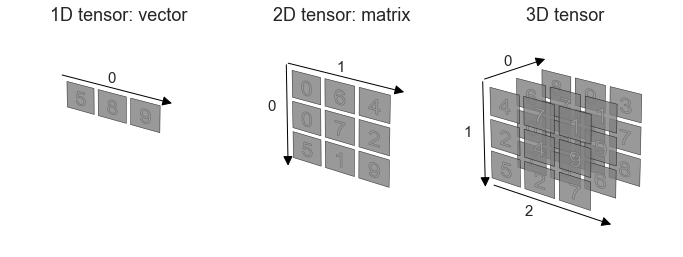

In [18]:
fig = plt.figure(figsize=(16,5))

np.random.seed(1)

ax1 = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142, projection='3d')
ax3 = fig.add_subplot(143, projection='3d')

k = 2.3
rx, ry = 2, 2
axis_length = 8

###############################################################################################
offset_x, offset_y, offset_z = -3, -2, 1.5
d = 5
i = 0
j = 2
for i in range(3):
    text3d(ax1, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
           zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
    bottom, left = i*k+offset_x, j*k+offset_y
    rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
    ax1.add_patch(rect)
    art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')

axis0 = Arrow3D([offset_x-0.5, offset_x-0.5+axis_length], [d+offset_z, d+offset_z], [d, d], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
ax1.add_artist(axis0)

ax1.text(offset_x-1+axis_length/2, d+offset_z, d+0.3, "0", fontsize=15)

ax1.set_xlim(0, 7)
ax1.set_ylim(0, 7)
ax1.set_zlim(0, 7)
ax1.set_xlabel('x')
ax1.view_init(20, -50)
# ax1.view_init(0, -90)
ax1.set_title("1D tensor: vector", fontsize=18)
ax1.axis('off')
###############################################################################################

###############################################################################################
offset_x, offset_y, offset_z = -1, 0, 1.5
d = 3
for i in range(3):
    for j in range(3):
        text3d(ax2, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
               zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
        bottom, left = i*k+offset_x, j*k+offset_y
        rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
        ax2.add_patch(rect)
        art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')

axis0 = Arrow3D([offset_x-0.5, offset_x-0.5], [left, left], [d+axis_length/2, d-axis_length/2], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
ax2.add_artist(axis0)
ax2.text(offset_x-2, left, d, "0", fontsize=15)

axis1 = Arrow3D([offset_x-0.5, offset_x-0.5+axis_length], [left, left], [d+axis_length/2, d+axis_length/2], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
ax2.add_artist(axis1)
ax2.text(offset_x-1+axis_length/2, left, d+axis_length/2+0.3, "1", fontsize=15)


ax2.set_xlim(0, 7)
ax2.set_ylim(0, 7)
ax2.set_zlim(0, 7)
ax2.view_init(20, -50)
# ax2.view_init(0, -90)
ax2.set_title("2D tensor: matrix", fontsize=18)
ax2.axis('off')
###############################################################################################

###############################################################################################
offset_x, offset_y, offset_z = 0, 0, 1.5

for d in range(0, 5, 2):
    for i in range(3):
        for j in range(3):
            text3d(ax3, (i*k+offset_x+.6, d+offset_z, j*k+offset_y+.4), "{}".format(np.random.randint(10)), 
                   zdir="y", size=1.5, usetex=True, ec="k", fc="#FFFFFF")
            bottom, left = i*k+offset_x, j*k+offset_y
            rect = Rectangle((bottom, left), rx, ry, alpha=.8, facecolor='gray', edgecolor='k')
            ax3.add_patch(rect)
            art3d.pathpatch_2d_to_3d(rect, z=d+offset_z, zdir='y')


axis0 = Arrow3D([offset_x-0.5, offset_x-0.5], [0+offset_z, 0+offset_z+5], [3+axis_length/2, 3+axis_length/2], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k", zorder=10)
ax3.add_artist(axis0)
ax3.text(offset_x, offset_z+1, 3.8+axis_length/2, "0", fontsize=15)

axis1 = Arrow3D([offset_x-0.5, offset_x-0.5], [0+offset_z, 0+offset_z], [3+axis_length/2, 3-axis_length/2], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k", zorder=10)
ax3.add_artist(axis1)
ax3.text(offset_x-0.5, 0, 3.5, "1", fontsize=15)

axis2 = Arrow3D([offset_x, offset_x+axis_length], [0+offset_z, 0+offset_z], [0-0.5, 0-0.5], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="k", zorder=10)
ax3.add_artist(axis2)
ax3.text(offset_x+0.5+axis_length/2, -1, 0, "2", fontsize=15)

ax3.set_xlim(0, 7)
ax3.set_ylim(0, 7)
ax3.set_zlim(0, 7)
ax3.view_init(20, -50)
# ax3.view_init(0, 0)
ax3.set_title("3D tensor", fontsize=18)
ax3.axis('off')
###############################################################################################

plt.subplots_adjust(hspace=0.05, wspace=0.0)

if file_print == True :
    fig.savefig("imgs/chap7/fig7-11.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-11.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

#### 축 순서 바꾸기 (transpose())

In [19]:
A = np.arange(1, 7).reshape(2, 3) 
A

array([[1, 2, 3],
       [4, 5, 6]])

In [20]:
A.transpose(1, 0)

array([[1, 4],
       [2, 5],
       [3, 6]])

- 3차원 어레이에 전치 적용하면, transpose(2, 1, 0) 실행한 것 처럼 적용됨

In [21]:
# 3차원 어레이 전치 적용
A = np.arange(1, 13).reshape(2, 2, -1)
A

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [22]:
A.T

array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [23]:
A = np.arange(1, 13).reshape(2, 2, -1)
A.transpose(1,0,2)

array([[[ 1,  2,  3],
        [ 7,  8,  9]],

       [[ 4,  5,  6],
        [10, 11, 12]]])

### 인덱싱

In [25]:
A = np.arange(30).reshape(5,6)
A

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [26]:
A[2,3]

15

In [28]:
# 슬라이싱 (파이썬 규칙과 동일 [start:end:stride])
A[:, 0::2]

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22],
       [24, 26, 28]])

In [29]:
A[[0,1,2,3,4], [1,2,3,1,0]] # A[np.arange(4), [1,2,3,1,0]]

array([ 1,  8, 15, 19, 24])

In [30]:
A > 20

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [31]:
A[A > 20]

array([21, 22, 23, 24, 25, 26, 27, 28, 29])

### 브로드캐스팅
- 모양이 다른 두 넘파이 어레이 사이에 연산이 수행될 때 어레이가 변경되는 규칙

In [32]:
A = np.array([1,2,3])
A * 2

array([2, 4, 6])

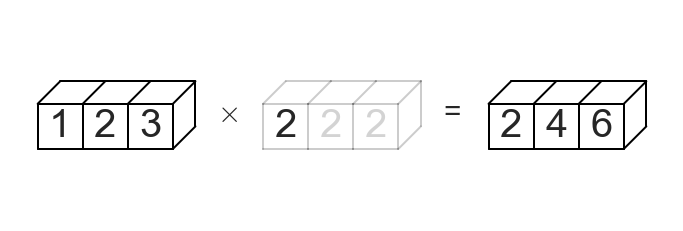

In [33]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 1, 1)

cube2d2(ax, (0,0),   0.1, 0.1, 0.05, '1', 40, 1.0, hidden=('R',), **box_solid)
cube2d2(ax, (0.1,0), 0.1, 0.1, 0.05, '2', 40, 1.0, hidden=('R',), **box_solid)
cube2d2(ax, (0.2,0), 0.1, 0.1, 0.05, '3', 40, 1.0, hidden=(None,), **box_solid)

ax.text(.42, .08, r'$\times$', ha='center', va='center', fontsize=30)

b_pos = 0.5
cube2d2(ax, (0+b_pos,0),   0.1, 0.1, 0.05, '2', 40, 1.0, hidden=('R',), **box_gray)
cube2d2(ax, (0.1+b_pos,0), 0.1, 0.1, 0.05, '2', 40, 0.2, hidden=('R',), **box_gray)
cube2d2(ax, (0.2+b_pos,0), 0.1, 0.1, 0.05, '2', 40, 0.2, **box_gray)

ax.text(.92, .08, '=', ha='center', va='center', fontsize=30)

cube2d2(ax, (0+b_pos*2,0),   0.1, 0.1, 0.05, '2', 40, 1.0, hidden=('R',), **box_solid)
cube2d2(ax, (0.1+b_pos*2,0), 0.1, 0.1, 0.05, '4', 40, 1.0, hidden=('R',), **box_solid)
cube2d2(ax, (0.2+b_pos*2,0), 0.1, 0.1, 0.05, '6', 40, 1.0, **box_solid)

ax.axis('off')
ax.axis('equal')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-12.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-12.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [34]:
np.random.seed(2)

m, n = 4, 3
A = np.random.randint(0, 10, m*n).reshape(m,n)
b = np.random.randint(0, 10, n)

In [35]:
A

array([[8, 8, 6],
       [2, 8, 7],
       [2, 1, 5],
       [4, 4, 5]])

In [36]:
b

array([7, 3, 6])

In [37]:
A*b

array([[56, 24, 36],
       [14, 24, 42],
       [14,  3, 30],
       [28, 12, 30]])

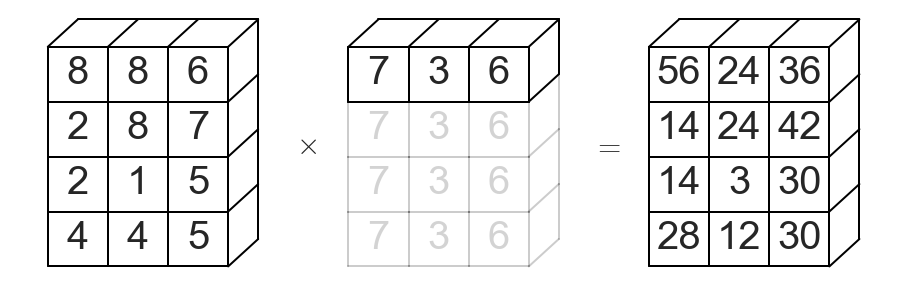

In [38]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)

dy = 0.1
dx = 0.0
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)    

ax.text(.43, .22, r'$\times$', ha='center', va='center', fontsize=30)

dx = 0.5        
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('R', 'U'), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=('R',), **box_solid)
        else :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('U',), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=(None,), **box_solid) 

ax.text(.93, .22, r'$=$', ha='center', va='center', fontsize=30)

C = A*b
dx = 1.0       
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)  
                
ax.axis('off')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-13.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-13.pdf", format='pdf', bbox_inches='tight')
    
    
plt.show()

In [39]:
np.random.seed(3)

m, n = 4, 3
b = np.random.randint(0, 10, n+1)

In [40]:
b

array([8, 9, 3, 8])

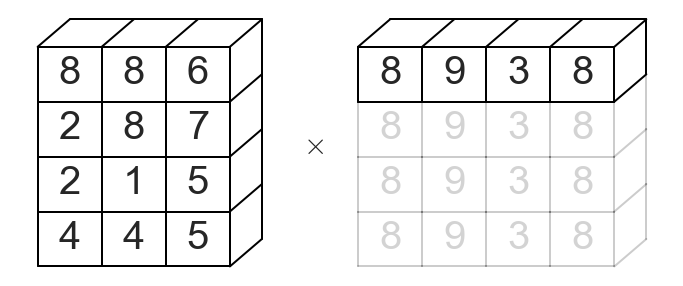

In [41]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)

dy = 0.1
dx = 0.0
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)    

ax.text(.43, .22, r'$\times$', ha='center', va='center', fontsize=30)

dx = 0.5        
for j in range(m) :
    for i in range(n+1):
        if i < n+1-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('R', 'U'), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=('R',), **box_solid)
        else :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('U',), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=(None,), **box_solid) 

ax.axis('off')                

if file_print == True :
    fig.savefig("imgs/chap7/fig7-14.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-14.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [42]:
C = A * b[:, np.newaxis] #-----[1] (4,)를 (4,1)로 만들기 위해 인덱스 오른쪽에 np.newaxis로 축 추가
C

array([[64, 64, 48],
       [18, 72, 63],
       [ 6,  3, 15],
       [32, 32, 40]])

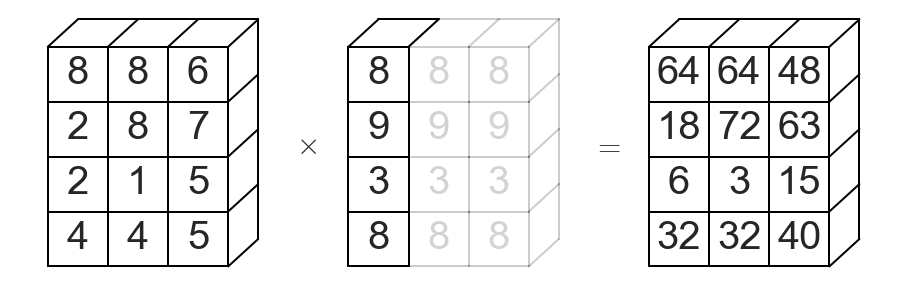

In [43]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)

dy = 0.1
dx = 0.0
for j in range(m) :
    for i in range(n) :
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, A[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)    

ax.text(.43, .22, r'$\times$', ha='center', va='center', fontsize=30)

dx = 0.5        
for j in range(m) :
    for i in range(n) :
        if i == 0 :
            style = box_solid
            la = 1.0
        else :
            style = box_gray
            la = 0.2
        
        if i < n-1 :
            if j < m-1 :
                if i == 0 :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=('R+', 'U'), **style)
                else :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=('R', 'U'), **style)
            else :
                if i == 0 : 
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=('R+',), **style)
                else :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=('R',), **style)
        else :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=('U',), **style)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[::-1][j], 40, la, hidden=(None,), **style) 

ax.text(.93, .22, r'$=$', ha='center', va='center', fontsize=30)

C = A * b.reshape(-1,1)  
dx = 1.0       
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)    

ax.axis('off')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-15.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-15.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [44]:
np.random.seed(11)

m, n = 4, 3
a = np.random.randint(0, 10, m).reshape(-1,1)
b = np.random.randint(0, 10, n)

a

array([[9],
       [0],
       [1],
       [7]])

In [45]:
b

array([1, 7, 2])

In [47]:
a*b

array([[ 9, 63, 18],
       [ 0,  0,  0],
       [ 1,  7,  2],
       [ 7, 49, 14]])

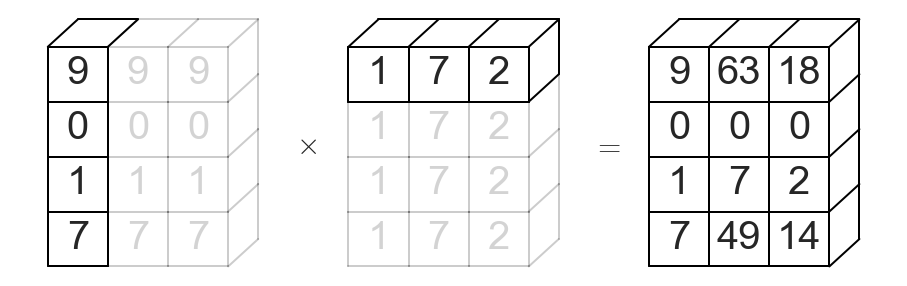

In [46]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)

dy = 0.1
dx = 0.0
for j in range(m) :
    for i in range(n) :
        if i == 0 :
            style = box_solid
            la = 1.0
        else :
            style = box_gray
            la = 0.2
        
        if i < n-1 :
            if j < m-1 :
                if i == 0 :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=('R+', 'U'), **style)
                else :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=('R', 'U'), **style)
            else :
                if i == 0 : 
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=('R+',), **style)
                else :
                    cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=('R',), **style)
        else :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=('U',), **style)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, a[::-1][j,0], 40, la, hidden=(None,), **style) 
ax.text(.43, .22, r'$\times$', ha='center', va='center', fontsize=30)

dx = 0.5        
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('R', 'U'), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=('R',), **box_solid)
        else :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 0.2, hidden=('U',), **box_gray)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, b[i], 40, 1.0, hidden=(None,), **box_solid) 

ax.text(.93, .22, r'$=$', ha='center', va='center', fontsize=30)

C = a*b
dx = 1.0       
for j in range(m) :
    for i in range(n):
        if i < n-1 :
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R', 'U'), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx,   0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('R',), **box_solid)
        else :    
            if j < m-1 :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=('U',), **box_solid)
            else :
                cube2d2(ax, (0+dy*i+dx, 0+dy*j), 0.1, 0.1, 0.05, C[::-1,:][j,i], 40, 1.0, hidden=(None,), **box_solid)    

ax.axis('off')

if file_print == True :
    fig.savefig("imgs/chap7/fig7-16.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap7/fig7-16.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 행렬 곱셈의 해석
- 행렬곱이 가진 의미는 벡터들이 서로 어떻게 결합되는가 하는 점과 관계가 있음

### 선형결합
- 차원이 같은 어떤벡터 a1, a2, ... , an이 있을 때 이 벡터 n개에 스칼라 n개를 곱해서 모두 더한 벡터 b를 만들 수 있음
    - 이런 식을 선형결합 또는 선형 조합이라고 함 (1차 결합이라는 용어도 사용)
    - 선형결합에서 모든 c가 0일 때만 다음 조건이 만족된다면 벡터 a들을 선형독립이라고 함
    
### 행렵 곱셈 해석 1 : 열 결합

In [48]:
np.random.seed(10)

A = np.random.randint(0, 9, 12).reshape(4,3)
b = np.random.randint(0, 9, 3).reshape(3,1)

In [49]:
A

array([[4, 0, 1],
       [0, 1, 8],
       [0, 8, 6],
       [4, 3, 0]])

In [50]:
b

array([[4],
       [6],
       [8]])

In [51]:
C = np.dot(A,b)

C

array([[24],
       [70],
       [96],
       [34]])

In [53]:
C_ = np.array([A[:,[i]]*b[i] for i in range(A.shape[1])]) # 인덱스 i에 대해 A[:, [i]]와 b[i]를 곱함 A를 두번감싼 이유는 형태유지 때문
print(C_.shape)
C_.sum(axis=0) # 0번 축 방향으로 열 벡터를 모두 더함

(3, 4, 1)


array([[24],
       [70],
       [96],
       [34]])

#### 뒤가 벡터가 아닌 행렬인 경우

In [54]:
B = np.random.randint(0, 9, 6).reshape(3,2)

In [55]:
C = np.dot(A,B)

C

array([[ 7, 38],
       [28, 49],
       [50, 44],
       [16, 35]])

In [57]:
C_ = np.array([ [A[:,[i]]*B[i,j] for i in range(A.shape[1]) ] for j in range(B.shape[1]) ])

print(C_.shape)
C_ = C_.transpose(1, 2, 0, 3)
print(C_.shape)
C_ = C_.sum(axis=0)
print(C_.shape)
C_.squeeze()

(2, 3, 4, 1)
(3, 4, 2, 1)
(4, 2, 1)


array([[ 7, 38],
       [28, 49],
       [50, 44],
       [16, 35]])

### 행렬 곱셈 해석 2 : 행 결합
- 행렬 A의 열 벡터들이 행벡터가 되면서 뒤에서 곱해짐
- 행렬곱 B.T * A.T가 A.T의 행벡터를 B.T의 행 요소로 선형결합한 결과임

In [59]:
np.dot(B.T, A.T)

array([[ 7, 28, 50, 16],
       [38, 49, 44, 35]])

## 행렬을 이용한 코딩
- 행렬을 이용할 때 for문을 쓰면 직관적이고 편리하지만 수행속도가 급격히 느려짐
- 이 문제를 해결하기 위해 행렬곱셈과 벡터 내적 적극적으로 활용함
    - 이 방법을 벡터화라고 함
    
### 벡터화 실습 1 (기본 곱셈)

In [60]:
A = np.random.randint(0,10,12).reshape(4,3) #-----[1]
x = np.random.randint(0,10,3)


print(A)
print(x)

[[5 3 9]
 [6 9 1]
 [9 4 2]
 [6 7 8]]
[8 9 2]


In [61]:
# 인덱스 별 곱한다음 더해주는 코드

m = x.shape[0] #-----[2]
y = [] #-----[3]
temp = 0
for i in range(A.shape[0]) : #-----[4]
    for j in range(m) : #-----[5]
        temp += A[i,j]*x[j] #-----[6]
    y.append(temp) #-----[7]
    temp = 0

In [62]:
y

[85, 131, 112, 127]

In [63]:
# 행렬곱으로 간단히 할 수 있음
A.dot(x)

array([ 85, 131, 112, 127])

In [64]:
A@x

array([ 85, 131, 112, 127])

### 벡터화 실습 2 (전치 곱셈)
- a의 인덱스 순서만 달라진 식

In [65]:
A = np.random.randint(0,10,12).reshape(3,4) 
x = np.random.randint(0,10,3)

In [66]:
m = x.shape[0] 
y = [] 
temp = 0
for i in range(A.shape[1]) : 
    for j in range(m) : 
        temp += A[j,i]*x[j] #-----[1]
    y.append(temp) 
    temp = 0

In [67]:
y

[8, 162, 97, 120]

In [68]:
y = A.T.dot(x) 
y

array([  8, 162,  97, 120])

In [69]:
A.T@x

array([  8, 162,  97, 120])

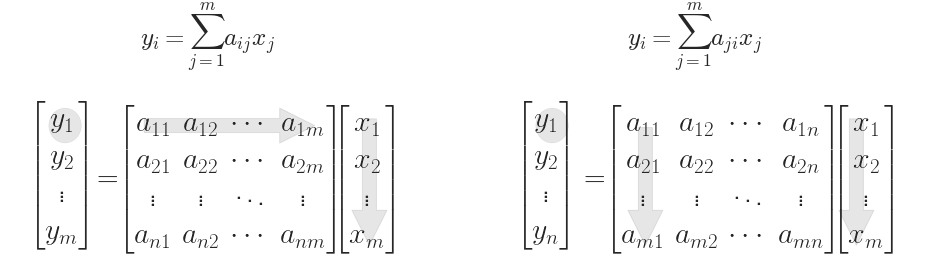

- 왼쪽은 y1를 계산하기 위한 행렬곱을 나타냄
- 오른쪽처럼 인덱스를 서로 뒤집으면 A행렬의 열벡터와 x가 내적되는 결과를 만들어냄
    - 즉, 전치시켜 행렬곱한 것과 같아짐
    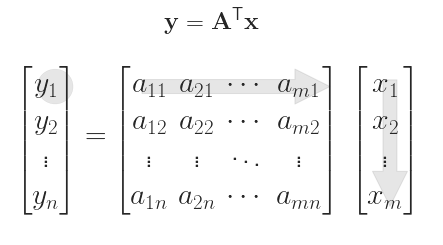
    
    
### 벡터화 실습 3 (선형회귀에서 경사도벡터 식)
- i의 최대인덱스를 n, j의 최대 인덱스를 m이라고 함
- X는 n행 m열을 가지는 행렬
- w는 m차원 벡터, yi를 요소로 가지는 벡터 y는 n차원 벡터
- n = 5, m= 2로 둠

In [72]:
np.random.seed(10)

n, m = 5, 2

X = np.random.rand(n, m)
w = np.random.rand(m)
y = np.random.rand(n)

In [73]:
X

array([[0.7713, 0.0208],
       [0.6336, 0.7488],
       [0.4985, 0.2248],
       [0.1981, 0.7605],
       [0.1691, 0.0883]])

In [74]:
w

array([0.6854, 0.9534])

In [75]:
y

array([0.0039, 0.5122, 0.8126, 0.6125, 0.7218])

In [76]:
g = np.zeros_like(w) # 결과벡터는 w와 차원이 같으므로 w와 같은 모양을 가진 0 벡터 생성

# X:(5,2), y:(5,), w:(2,)
for j in range(m): # for문으로 g[j]를 하나씩 계산
    for i in range(n): # 주어진 식 그대로 코딩 (경사도벡터 식과 동일)
        g[j] += (np.dot(X[i,:], w) - y[i]) * X[i,j]

In [77]:
g

array([0.656 , 0.5726])

In [78]:
g = np.dot(X.T, np.dot(X,w)-y)

In [79]:
g

array([0.656 , 0.5726])

- 평균 코드 실행시간 비교

In [80]:
%%timeit
# X:(5,2), y:(5,), w:(2,)
for j in range(m):
    for i in range(n):
        g[j] += (np.dot(X[i,:], w) - y[i]) * X[i,j]

41.6 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [81]:
%%timeit
g = np.dot(X.T, np.dot(X,w)-y)

6.5 µs ± 20.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
